# Tools

In [1]:
import pandas as pd
import numpy as np

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

from sklearn import preprocessing as pp
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.metrics import log_loss, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve,average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
import xgboost as xgb
import lightgbm as lgb

plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

# Read & preview the data

In [2]:
df = pd.read_csv('dataset/creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.shape

(284807, 31)

# Data Exploratory

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
counter = df['Class'].value_counts()/len(df)

Text(0.5, 1.0, 'Frequency Percentage by Class')

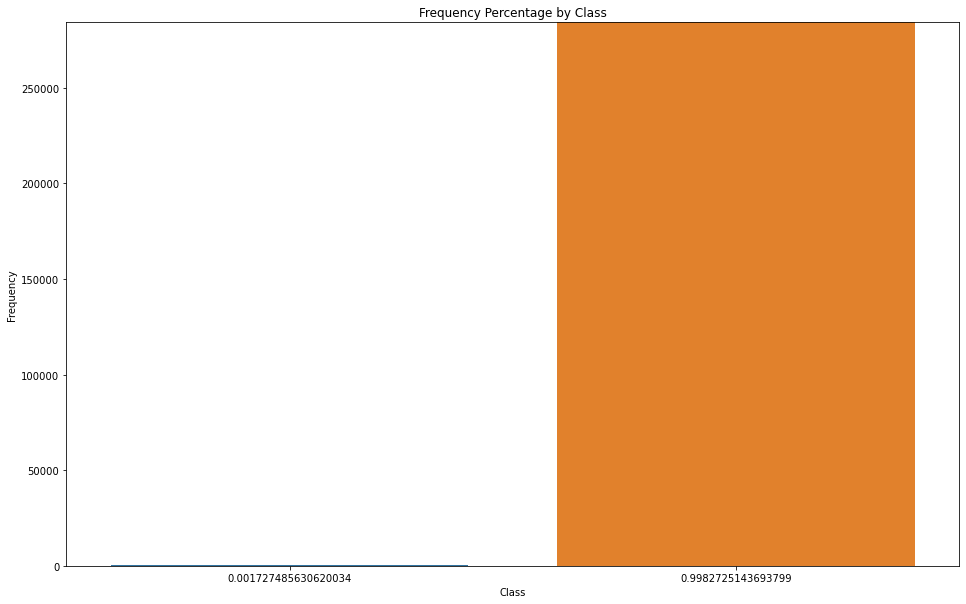

In [9]:
fig = plt.figure(figsize=(16,10))
sns.countplot(data =  counter, x=df['Class'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency Percentage by Class')

## fraudolent transactions are 0.0017% of the total transactions

In [10]:
492/284807, 284315/284807

(0.001727485630620034, 0.9982725143693799)

## check missing values

<AxesSubplot:>

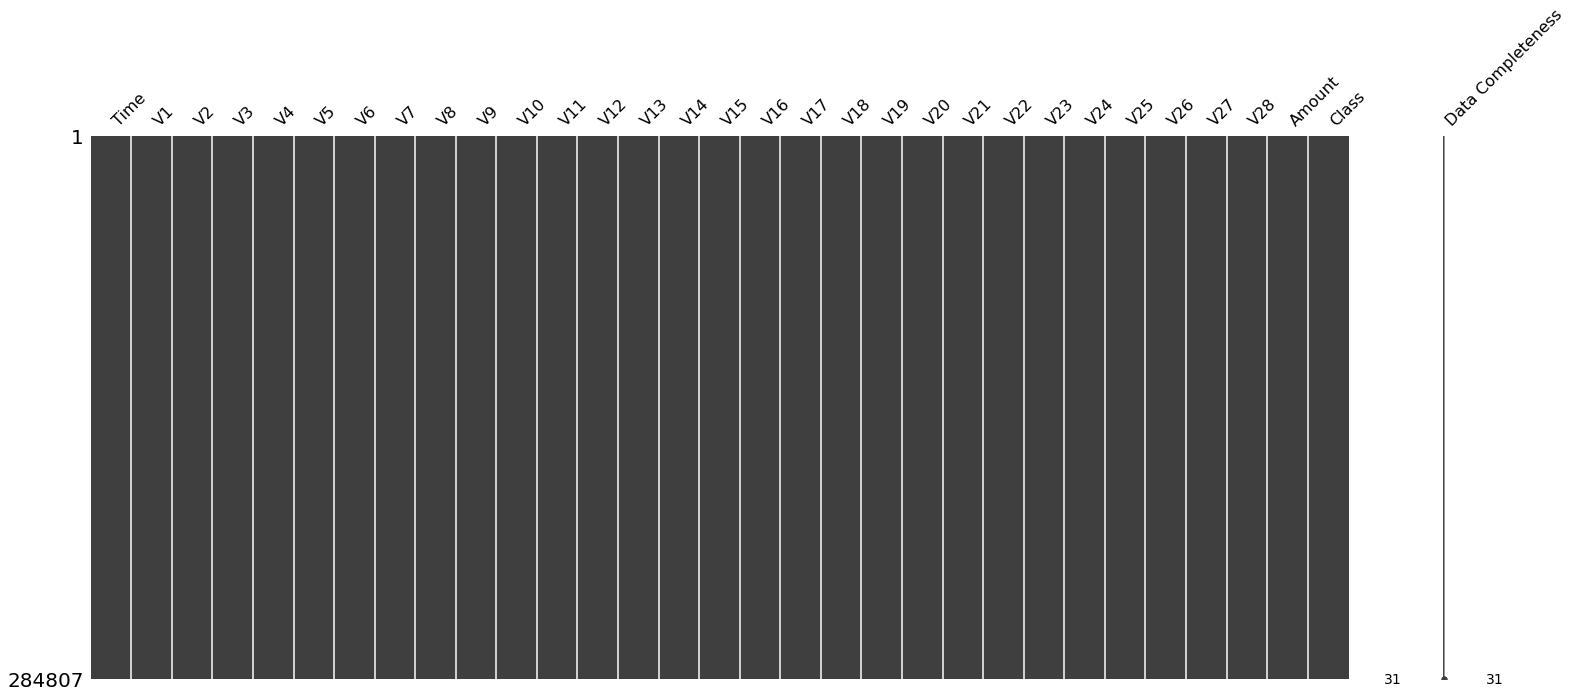

In [11]:
msno.matrix(df, labels=True)

In [12]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## there are multiple transaction at some timestamp

In [13]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

<AxesSubplot:xlabel='Class', ylabel='Amount'>

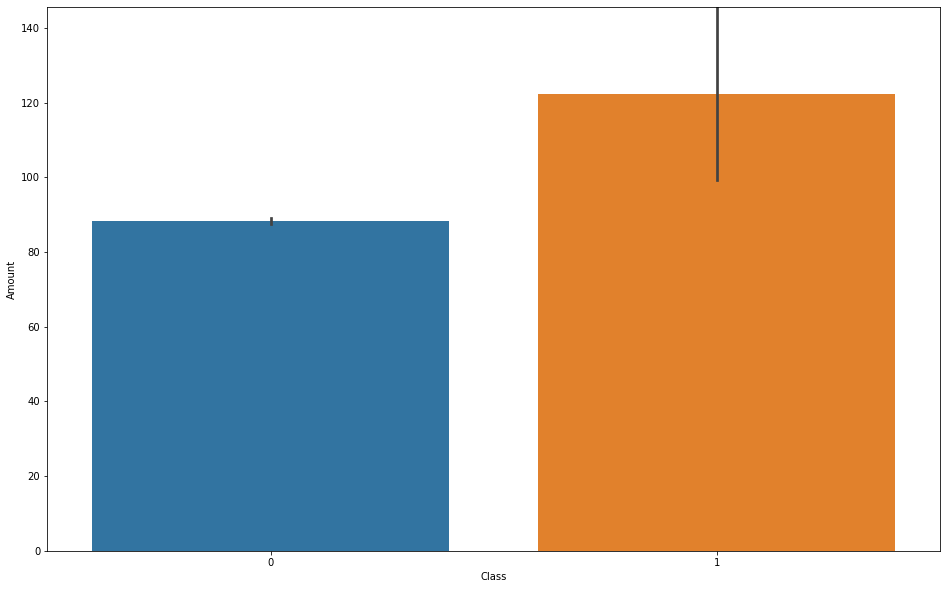

In [14]:
fig = plt.figure(figsize=(16,10))
sns.barplot(data=df, x='Class', y='Amount')

In [15]:
X = df.copy().drop(columns=['Class'])
Y = df['Class'].copy()

# Feature Engineering

## - Standard Scaler

## features to scale

In [16]:
to_scale = X.drop(['Time'], axis=1).columns

In [17]:
stdsc = pp.StandardScaler(copy=True)

In [18]:
X.loc[:,to_scale] = stdsc.fit_transform(X[to_scale])

In [19]:
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,-8.157366e-16,3.154853e-17,-4.409878e-15,-6.734811e-16,-2.874435e-16,4.168992e-16,-8.767997e-16,-2.423604e-16,3.078727e-16,...,2.754870e-16,1.685077e-17,1.478472e-15,-6.797197e-16,1.234659e-16,-7.659279e-16,3.247603e-16,-2.953495e-18,5.401572e-17,3.202236e-16
std,47488.145955,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,54201.500000,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,84692.000000,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,139320.500000,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,172792.000000,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


<AxesSubplot:>

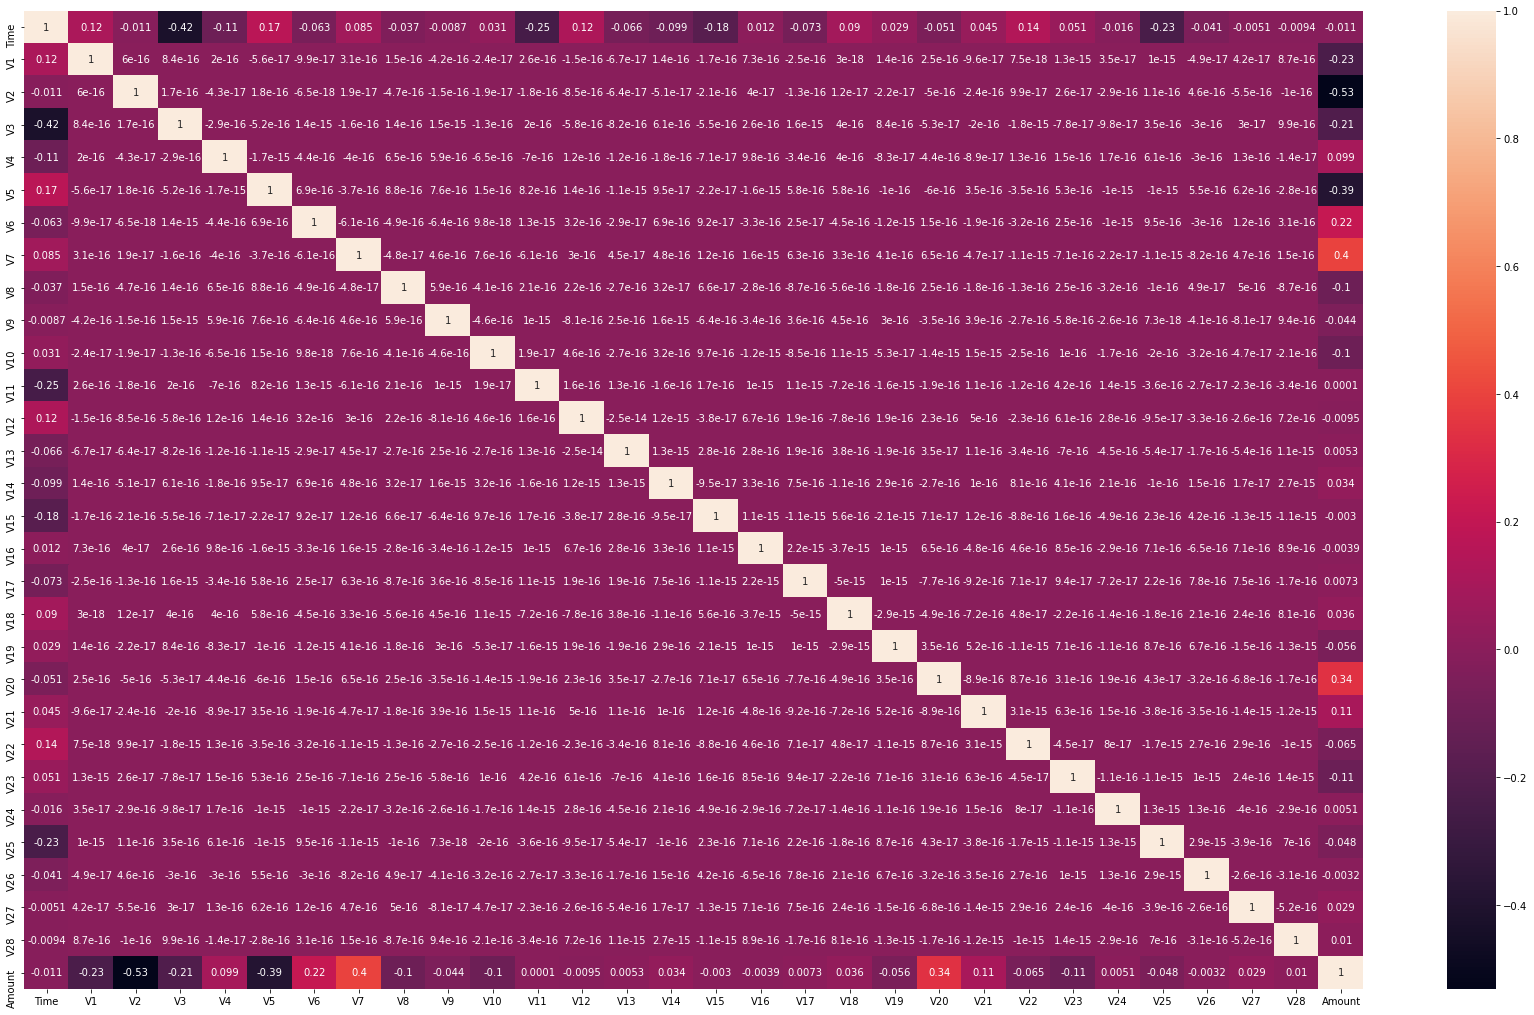

In [20]:
plt.figure(figsize=(30,18))
sns.heatmap(X.astype(float).corr(), annot=True)

# Train-Test-Split

In [21]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.33, random_state=2018, stratify=Y)

In [22]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((190820, 30), (93987, 30), (190820,), (93987,))

# k-Fold cross-validation sets

In [23]:
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2018)

# Evaluate 4 model on Train Set

## *model: Logistic Regression 

In [24]:
penalty = 'l2'
C = 1.0
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
n_jobs = 1

logReg = LogisticRegression(penalty=penalty, C=C, class_weight=class_weight, random_state=random_state, solver=solver, n_jobs=n_jobs)

In [25]:
model = logReg

training_scores = []
cv_scores = []

for train_index, cv_index in k_fold.split(Xtrain, ytrain):
    Xtrain_fold, Xcv_fold = Xtrain.iloc[train_index,:], Xtrain.iloc[cv_index,:]
    ytrain_fold, ycv_fold = ytrain.iloc[train_index], ytrain.iloc[cv_index]
    
    model.fit(Xtrain_fold, ytrain_fold)
    
    loglossTraining = log_loss(ytrain_fold, model.predict_proba(Xtrain_fold))
    training_scores.append(loglossTraining)
    
    loglossCV = log_loss(ycv_fold, model.predict_proba(Xcv_fold))
    cv_scores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print(f'CV Log Loss: {loglossCV}')

loglossLogReg = log_loss(ytrain, model.predict_proba(Xtrain))
print(f'Logistic Regression Log Loss: {loglossLogReg}')

Training Log Loss:  0.10966453051042847
CV Log Loss: 0.1087889124611638
Training Log Loss:  0.10455175106130675
CV Log Loss: 0.10402950798831906
Training Log Loss:  0.11550401227398924
CV Log Loss: 0.11788541134010633
Training Log Loss:  0.11552232309053004
CV Log Loss: 0.11810756986018588
Training Log Loss:  0.09707836009057293
CV Log Loss: 0.09695887500222078
Logistic Regression Log Loss: 0.0970544630729025


In [26]:
ytrain_pred_proba = model.predict_proba(Xtrain)[::,1]

In [27]:
ytrain_pred_proba

array([2.28108022e-06, 2.07983068e-02, 1.82395178e-01, ...,
       1.19497820e-02, 4.69310674e-03, 4.06596527e-05])

In [28]:
fpr, tpr, thresholds = roc_curve(ytrain, ytrain_pred_proba)

In [30]:
areaUnderROC = auc(fpr, tpr)

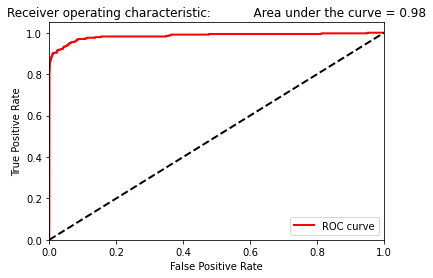

In [31]:
plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
          Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [32]:
average_precision = average_precision_score(ytrain, ytrain_pred_proba)

In [33]:
print(f'The Average Precision is: {round(average_precision, 2)}')

The Average Precision is: 0.75


In [34]:
auc = roc_auc_score(ytrain, ytrain_pred_proba)

In [35]:
print(f'The Area Under the Curve, AUC: {round(auc,3)}')

The Area Under the Curve, AUC: 0.985


In [36]:
precision, recall, thresholds = precision_recall_curve(ytrain, ytrain_pred_proba)

In [37]:
# alternative way
# disp = plot_precision_recall_curve(model, Xtrain, ytrain)
# plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
# plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

## *model: Random Forests

In [24]:
n_estimators = 10
max_features = 'auto'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 2018
class_weight = 'balanced'

RFC = RandomForestClassifier(n_estimators=n_estimators, 
        max_features=max_features, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf, 
        max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap, 
        oob_score=oob_score, n_jobs=n_jobs, random_state=random_state, 
        class_weight=class_weight)

In [25]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[], index=ytrain.index,columns=[0,1])

model = RFC

for train_index, cv_index in k_fold.split(Xtrain, ytrain):
    X_train_fold, X_cv_fold = Xtrain.iloc[train_index,:], Xtrain.iloc[cv_index,:]
    y_train_fold, y_cv_fold = ytrain.iloc[train_index], ytrain.iloc[cv_index]
    
    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, model.predict_proba(X_train_fold)[:,1])
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = model.predict_proba(X_cv_fold)  
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossRandomForestsClassifier = log_loss(ytrain, predictionsBasedOnKFolds.loc[:,1])
print('Random Forests Log Loss: ', loglossRandomForestsClassifier)

Training Log Loss:  0.0004570758747246713
CV Log Loss:  0.009090797476425144
Training Log Loss:  0.0004101805310493279
CV Log Loss:  0.012640234648018377
Training Log Loss:  0.00040027341363592047
CV Log Loss:  0.009990776910341356
Training Log Loss:  0.0003894650263288808
CV Log Loss:  0.006620007375395402
Training Log Loss:  0.0004291016183715201
CV Log Loss:  0.01348243171548044
Random Forests Log Loss:  0.010364849625132141


In [26]:
ytrain.shape, predictionsBasedOnKFolds.loc[:,1].shape, X_cv_fold.shape, X_train_fold.shape

((190820,), (190820,), (38164, 30), (152656, 30))

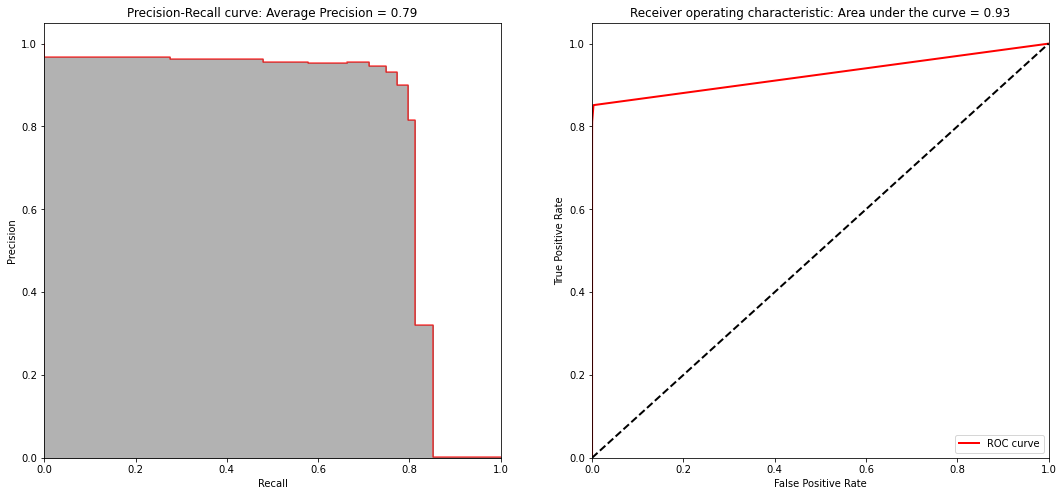

In [27]:
preds = pd.concat([ytrain,predictionsBasedOnKFolds.loc[:,1]], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsRandomForests = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'], preds['prediction'])

plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.step(recall, precision, color='r', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.subplot(1,2,2)
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## *model: XGBoost

In [24]:
params_xGB = {
    'nthread':16, #number of cores
    #'learning rate': 0.3, #range 0 to 1, default 0.3
    'gamma': 0, #range 0 to infinity, default 0 
        # increase to reduce complexity (increase bias, reduce variance)
    'max_depth': 6, #range 1 to infinity, default 6
    'min_child_weight': 1, #range 0 to infinity, default 1
    'max_delta_step': 0, #range 0 to infinity, default 0
    'subsample': 1.0, #range 0 to 1, default 1
        # subsample ratio of the training examples
    'colsample_bytree': 1.0, #range 0 to 1, default 1 
        # subsample ratio of features
    'objective':'binary:logistic',
    'num_class':1,
    'eval_metric':'logloss',
    'seed':2018
}

In [25]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[], index=ytrain.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(Xtrain)), ytrain.ravel()):
    X_train_fold, X_cv_fold = Xtrain.iloc[train_index,:], Xtrain.iloc[cv_index,:]
    y_train_fold, y_cv_fold = ytrain.iloc[train_index], ytrain.iloc[cv_index]
    
    dtrain = xgb.DMatrix(data=X_train_fold, label=y_train_fold)
    dCV = xgb.DMatrix(data=X_cv_fold)
    
    bst = xgb.cv(params_xGB, dtrain, num_boost_round=2000, 
                 nfold=5, early_stopping_rounds=200, verbose_eval=50)
    
    best_rounds = np.argmin(bst['test-logloss-mean'])
    bst = xgb.train(params_xGB, dtrain, best_rounds)
    
    loglossTraining = log_loss(y_train_fold, bst.predict(dtrain))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = bst.predict(dCV)
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossXGBoostGradientBoosting = log_loss(ytrain, predictionsBasedOnKFolds.loc[:,'prediction'])
print('XGBoost Gradient Boosting Log Loss: ', loglossXGBoostGradientBoosting)

Training Log Loss:  0.0009698748139954727
CV Log Loss:  0.0023983441021560694
Training Log Loss:  0.000872351723518117
CV Log Loss:  0.0031189630212641204
Training Log Loss:  0.0007123358367720159
CV Log Loss:  0.0022997797311887728
Training Log Loss:  0.0009144685956787081
CV Log Loss:  0.0026294304116278163
Training Log Loss:  0.0005772056222738951
CV Log Loss:  0.0036862243093052187
XGBoost Gradient Boosting Log Loss:  0.0028265483151084


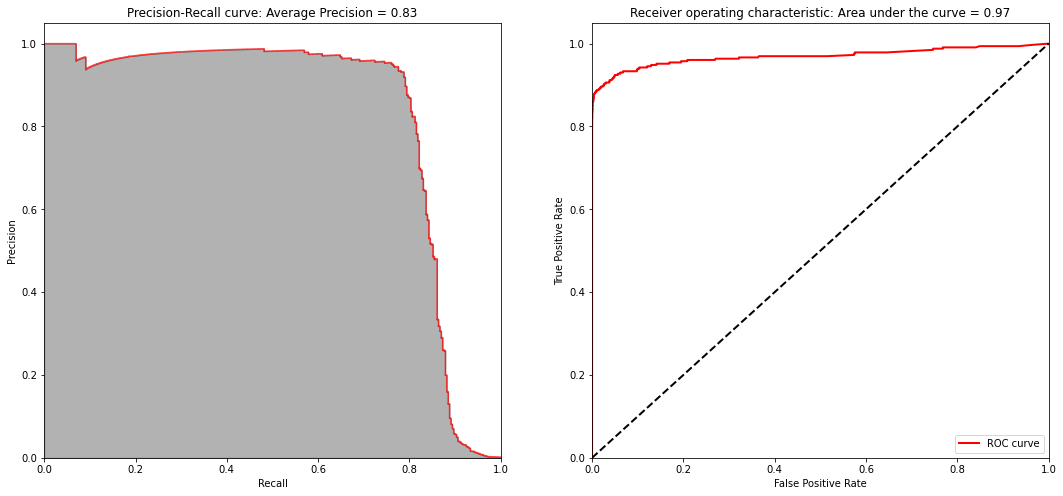

In [27]:
preds = pd.concat([ytrain,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsRandomForests = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'], preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'], preds['prediction'])

plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.step(recall, precision, color='r', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.subplot(1,2,2)
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

## *model: LightGBM

In [24]:
params_lightGB = {
    'task': 'train',
    'num_class':1,
    'boosting': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'metric_freq':50,
    'is_training_metric':False,
    'max_depth':4,
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'bagging_freq': 0,
    'bagging_seed': 2018,
    'verbose': -1,
    'num_threads':16
}

In [25]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[], index=ytrain.index,columns=['prediction'])

for train_index, cv_index in k_fold.split(np.zeros(len(Xtrain)), ytrain.ravel()):
    X_train_fold, X_cv_fold = Xtrain.iloc[train_index,:], Xtrain.iloc[cv_index,:]
    y_train_fold, y_cv_fold = ytrain.iloc[train_index], ytrain.iloc[cv_index]
    
    lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
    lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
    gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                   valid_sets=lgb_eval, early_stopping_rounds=200)
    
    loglossTraining = log_loss(y_train_fold, gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
    trainingScores.append(loglossTraining)
    
    predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration) 
    loglossCV = log_loss(y_cv_fold, predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
    cvScores.append(loglossCV)
    
    print('Training Log Loss: ', loglossTraining)
    print('CV Log Loss: ', loglossCV)
    
loglossLightGBMGradientBoosting = log_loss(ytrain, predictionsBasedOnKFolds.loc[:,'prediction'])
print('LightGBM Gradient Boosting Log Loss: ', loglossLightGBMGradientBoosting)

/home/pit/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.



[1]	valid_0's binary_logloss: 0.00634115
Training until validation scores don't improve for 200 rounds
[2]	valid_0's binary_logloss: 0.00627113
[3]	valid_0's binary_logloss: 0.00620105
[4]	valid_0's binary_logloss: 0.00615078
[5]	valid_0's binary_logloss: 0.00609437
[6]	valid_0's binary_logloss: 0.00605299
[7]	valid_0's binary_logloss: 0.00599903
[8]	valid_0's binary_logloss: 0.00594246
[9]	valid_0's binary_logloss: 0.00588891
[10]	valid_0's binary_logloss: 0.0058368
[11]	valid_0's binary_logloss: 0.00578315
[12]	valid_0's binary_logloss: 0.00573411
[13]	valid_0's binary_logloss: 0.0056854
[14]	valid_0's binary_logloss: 0.0056367
[15]	valid_0's binary_logloss: 0.0055896
[16]	valid_0's binary_logloss: 0.00554671
[17]	valid_0's binary_logloss: 0.00550416
[18]	valid_0's binary_logloss: 0.00546486
[19]	valid_0's binary_logloss: 0.00542391
[20]	valid_0's binary_logloss: 0.00538498
[21]	valid_0's binary_logloss: 0.00534793
[22]	valid_0's binary_logloss: 0.00531051
[23]	valid_0's binary_loglo

/home/pit/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.



[1]	valid_0's binary_logloss: 0.00650326
Training until validation scores don't improve for 200 rounds
[2]	valid_0's binary_logloss: 0.00640575
[3]	valid_0's binary_logloss: 0.00634752
[4]	valid_0's binary_logloss: 0.00628641
[5]	valid_0's binary_logloss: 0.00623805
[6]	valid_0's binary_logloss: 0.00618348
[7]	valid_0's binary_logloss: 0.00612912
[8]	valid_0's binary_logloss: 0.00608272
[9]	valid_0's binary_logloss: 0.00603122
[10]	valid_0's binary_logloss: 0.00598057
[11]	valid_0's binary_logloss: 0.00594054
[12]	valid_0's binary_logloss: 0.00589761
[13]	valid_0's binary_logloss: 0.00584687
[14]	valid_0's binary_logloss: 0.00579724
[15]	valid_0's binary_logloss: 0.00575092
[16]	valid_0's binary_logloss: 0.00569612
[17]	valid_0's binary_logloss: 0.00565724
[18]	valid_0's binary_logloss: 0.00561232
[19]	valid_0's binary_logloss: 0.00557027
[20]	valid_0's binary_logloss: 0.00552668
[21]	valid_0's binary_logloss: 0.00548569
[22]	valid_0's binary_logloss: 0.00543983
[23]	valid_0's binary_l

/home/pit/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.



[1]	valid_0's binary_logloss: 0.00598384
Training until validation scores don't improve for 200 rounds
[2]	valid_0's binary_logloss: 0.00591434
[3]	valid_0's binary_logloss: 0.00583836
[4]	valid_0's binary_logloss: 0.005768
[5]	valid_0's binary_logloss: 0.00569818
[6]	valid_0's binary_logloss: 0.00561621
[7]	valid_0's binary_logloss: 0.00554444
[8]	valid_0's binary_logloss: 0.00547904
[9]	valid_0's binary_logloss: 0.00539964
[10]	valid_0's binary_logloss: 0.00534096
[11]	valid_0's binary_logloss: 0.00528728
[12]	valid_0's binary_logloss: 0.0052319
[13]	valid_0's binary_logloss: 0.00518247
[14]	valid_0's binary_logloss: 0.00513405
[15]	valid_0's binary_logloss: 0.00508548
[16]	valid_0's binary_logloss: 0.00503678
[17]	valid_0's binary_logloss: 0.00498865
[18]	valid_0's binary_logloss: 0.00494693
[19]	valid_0's binary_logloss: 0.00490706
[20]	valid_0's binary_logloss: 0.00486318
[21]	valid_0's binary_logloss: 0.00482316
[22]	valid_0's binary_logloss: 0.00478233
[23]	valid_0's binary_logl

/home/pit/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.



[1]	valid_0's binary_logloss: 0.00626824
Training until validation scores don't improve for 200 rounds
[2]	valid_0's binary_logloss: 0.00613614
[3]	valid_0's binary_logloss: 0.00606553
[4]	valid_0's binary_logloss: 0.00600612
[5]	valid_0's binary_logloss: 0.00594213
[6]	valid_0's binary_logloss: 0.00588769
[7]	valid_0's binary_logloss: 0.00583143
[8]	valid_0's binary_logloss: 0.0057648
[9]	valid_0's binary_logloss: 0.00570793
[10]	valid_0's binary_logloss: 0.00564329
[11]	valid_0's binary_logloss: 0.00559118
[12]	valid_0's binary_logloss: 0.00553095
[13]	valid_0's binary_logloss: 0.00548574
[14]	valid_0's binary_logloss: 0.00543371
[15]	valid_0's binary_logloss: 0.00538822
[16]	valid_0's binary_logloss: 0.00534658
[17]	valid_0's binary_logloss: 0.00529542
[18]	valid_0's binary_logloss: 0.00525414
[19]	valid_0's binary_logloss: 0.00521224
[20]	valid_0's binary_logloss: 0.00517463
[21]	valid_0's binary_logloss: 0.00513421
[22]	valid_0's binary_logloss: 0.00509794
[23]	valid_0's binary_lo

/home/pit/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.



[1]	valid_0's binary_logloss: 0.00657581
Training until validation scores don't improve for 200 rounds
[2]	valid_0's binary_logloss: 0.00650767
[3]	valid_0's binary_logloss: 0.00644823
[4]	valid_0's binary_logloss: 0.00639367
[5]	valid_0's binary_logloss: 0.00633427
[6]	valid_0's binary_logloss: 0.00628251
[7]	valid_0's binary_logloss: 0.00623841
[8]	valid_0's binary_logloss: 0.00619429
[9]	valid_0's binary_logloss: 0.00615369
[10]	valid_0's binary_logloss: 0.0061147
[11]	valid_0's binary_logloss: 0.00607786
[12]	valid_0's binary_logloss: 0.00603463
[13]	valid_0's binary_logloss: 0.00599403
[14]	valid_0's binary_logloss: 0.0059597
[15]	valid_0's binary_logloss: 0.00592054
[16]	valid_0's binary_logloss: 0.00588652
[17]	valid_0's binary_logloss: 0.00585141
[18]	valid_0's binary_logloss: 0.00581567
[19]	valid_0's binary_logloss: 0.0057843
[20]	valid_0's binary_logloss: 0.00574858
[21]	valid_0's binary_logloss: 0.00571364
[22]	valid_0's binary_logloss: 0.00568501
[23]	valid_0's binary_logl

In [26]:
print('LightGBM Gradient Boosting Log Loss: ', loglossLightGBMGradientBoosting)

LightGBM Gradient Boosting Log Loss:  0.00280873207026739


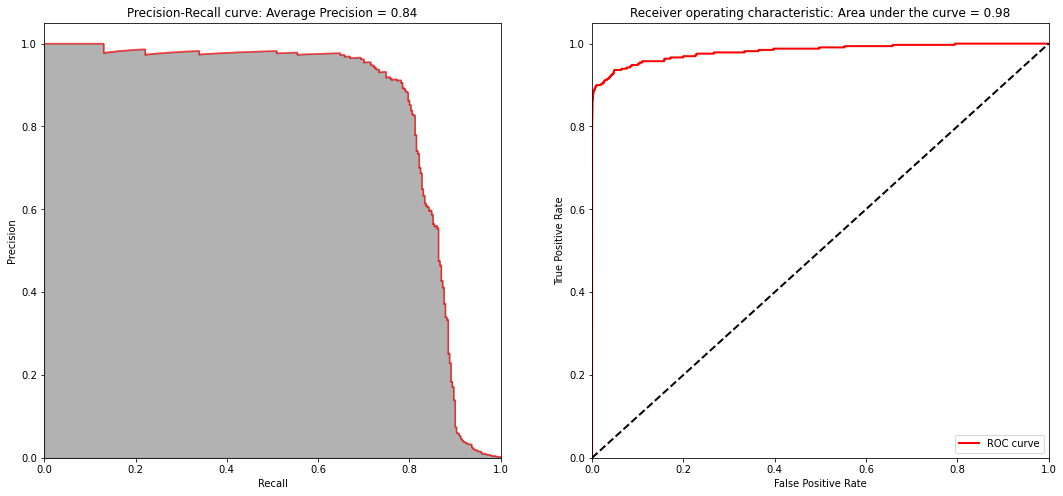

In [27]:
preds = pd.concat([ytrain,predictionsBasedOnKFolds.loc[:,'prediction']], axis=1)
preds.columns = ['trueLabel','prediction']
predictionsBasedOnKFoldsLightGBMGradientBoosting = preds.copy()

precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['prediction'])
average_precision = average_precision_score(preds['trueLabel'],preds['prediction'])

plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.step(recall, precision, color='r', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(average_precision))

fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
areaUnderROC = auc(fpr, tpr)

plt.subplot(1,2,2)
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

# Models Evaluation on Test Set

## - logloss Test Set

In [28]:
predictionsTestSetLogisticRegression = pd.DataFrame(data=[],index=ytest.index,columns=['prediction'])
predictionsTestSetLogisticRegression.loc[:,'prediction'] = logReg.predict_proba(Xtest)[:,1]
logLossTestSetLogisticRegression = log_loss(ytest, predictionsTestSetLogisticRegression)
print(f'Log Loss of Logistic Regression on Test Set: {logLossTestSetLogisticRegression}')

Log Loss of Logistic Regression on Test Set: 0.09672784061977366


In [27]:
predictionsTestSetRandomForests = pd.DataFrame(data=[],index=ytest.index,columns=['prediction'])
predictionsTestSetRandomForests.loc[:,'prediction'] = RFC.predict_proba(Xtest)[:,1]
logLossTestSetRandomForests = log_loss(ytest, predictionsTestSetRandomForests)
print(f'Log Loss of Random Forests on Test Set: {logLossTestSetRandomForests}')

Log Loss of Random Forests on Test Set: 0.009018284462863804


In [26]:
predictionsTestSetXGBoostGradientBoosting = pd.DataFrame(data=[],index=ytest.index,columns=['prediction'])
dtest = xgb.DMatrix(data=Xtest)
predictionsTestSetXGBoostGradientBoosting.loc[:,'prediction'] = bst.predict(dtest)
logLossTestSetXGBoostGradientBoosting = log_loss(ytest, predictionsTestSetXGBoostGradientBoosting)
print(f'Log Loss of Random Forests on Test Set: {logLossTestSetXGBoostGradientBoosting}')

Log Loss of Random Forests on Test Set: 0.002424374472450827


In [26]:
predictionsTestSetLightGBMGradientBoosting = pd.DataFrame(data=[],index=ytest.index,columns=['prediction'])
predictionsTestSetLightGBMGradientBoosting.loc[:,'prediction'] = gbm.predict(Xtest, num_iteration=gbm.best_iteration)
logLossTestSetLightGBMGradientBoosting = log_loss(ytest, predictionsTestSetLightGBMGradientBoosting)
print(f'Log Loss of LightGBM Gradient Boosting on Test Set: {logLossTestSetLightGBMGradientBoosting}')

Log Loss of LightGBM Gradient Boosting on Test Set: 0.002523122137335972


## - auc roc Test Set

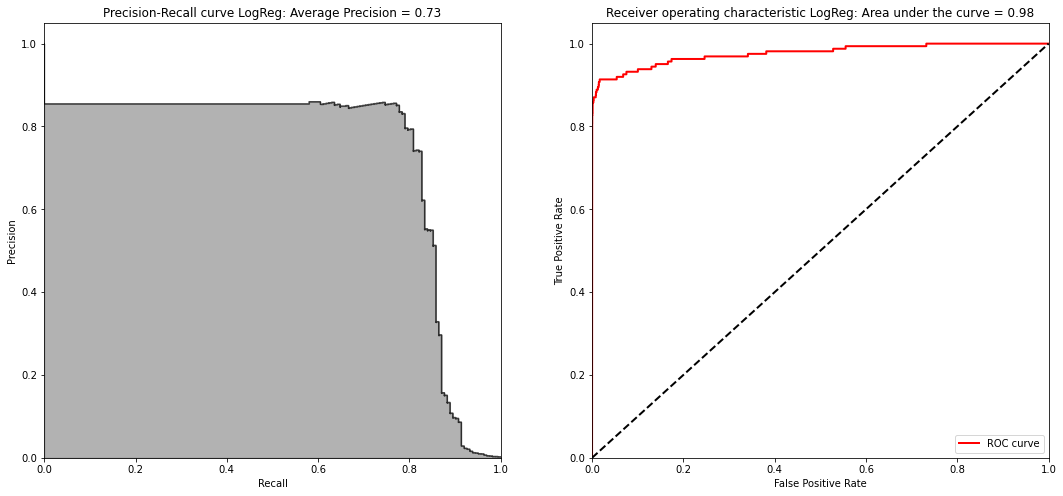

In [30]:
precision, recall, thresholds = precision_recall_curve(ytest,predictionsTestSetLogisticRegression)
average_precision = average_precision_score(ytest,predictionsTestSetLogisticRegression)

plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve LogReg: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(ytest,predictionsTestSetLogisticRegression)
areaUnderROC = auc(fpr, tpr)

plt.subplot(1,2,2)
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic LogReg: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")

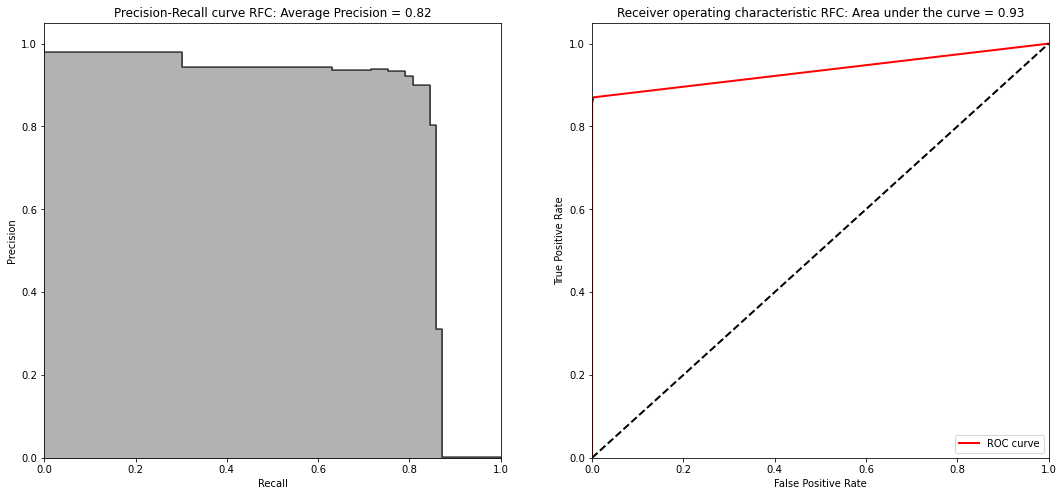

In [28]:
precision, recall, thresholds = precision_recall_curve(ytest,predictionsTestSetRandomForests)
average_precision = average_precision_score(ytest,predictionsTestSetRandomForests)

plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve RFC: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(ytest,predictionsTestSetRandomForests)
areaUnderROC = auc(fpr, tpr)

plt.subplot(1,2,2)
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic RFC: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")

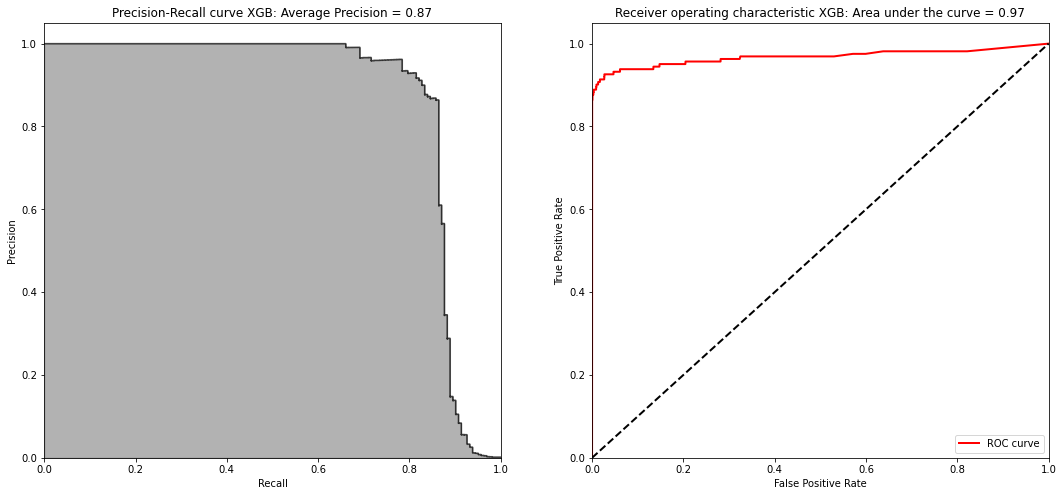

In [27]:
precision, recall, thresholds = precision_recall_curve(ytest,predictionsTestSetXGBoostGradientBoosting)
average_precision = average_precision_score(ytest,predictionsTestSetXGBoostGradientBoosting)

plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve XGB: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(ytest,predictionsTestSetXGBoostGradientBoosting)
areaUnderROC = auc(fpr, tpr)

plt.subplot(1,2,2)
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic XGB: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")

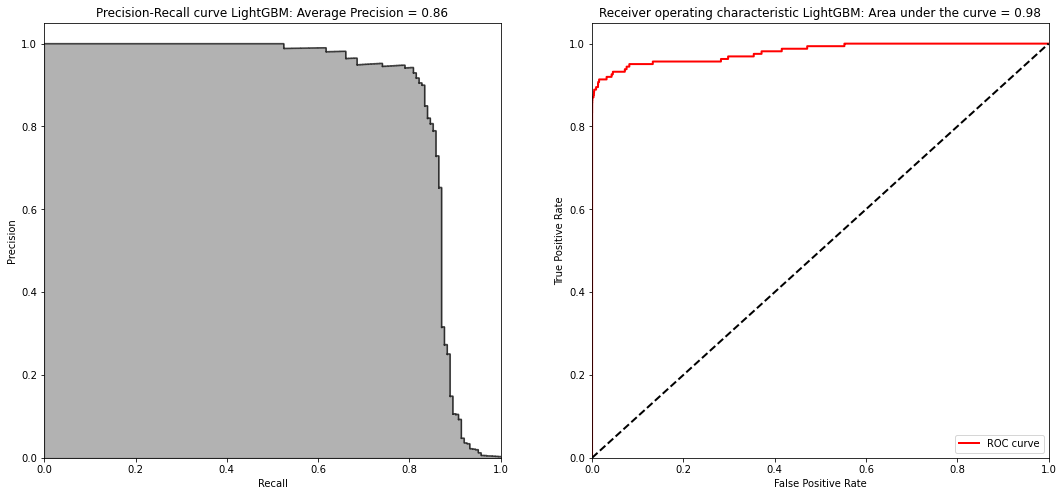

In [27]:
precision, recall, thresholds = precision_recall_curve(ytest,predictionsTestSetLightGBMGradientBoosting)
average_precision = average_precision_score(ytest,predictionsTestSetLightGBMGradientBoosting)

plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve LightGBM: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = roc_curve(ytest,predictionsTestSetLightGBMGradientBoosting)
areaUnderROC = auc(fpr, tpr)

plt.subplot(1,2,2)
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic LightGBM: Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")

# -----Functions-----

In [38]:
def log_loss_training_cv(x, y, model):
    """
    input: X_train, y_train, model
    output: Training and Cross-Validation log loss results
    """
    

    training_scores = []
    cv_scores = []

    for train_index, cv_index in k_fold.split(x, y):
        Xtrain_fold, Xcv_fold = x.iloc[train_index,:], x.iloc[cv_index,:]
        ytrain_fold, ycv_fold = y.iloc[train_index], y.iloc[cv_index]
    
        model.fit(Xtrain_fold, ytrain_fold)
    
        loglossTraining = log_loss(ytrain_fold, model.predict_proba(Xtrain_fold))
        training_scores.append(loglossTraining)
    
        loglossCV = log_loss(ycv_fold, model.predict_proba(Xcv_fold))
        cv_scores.append(loglossCV)
    
        print(f'Training Log Loss: {loglossTraining}')
        print(f' CV Log Loss: {loglossCV}')
        
    logloss_m = log_loss(ytrain, model.predict_proba(Xtrain))
    print(f'model {model} Log Loss: {logloss_m}')

In [ ]:
def auc_pr_curve(y_true, y_pred):
    """
    input: y_true, y_pred_proba of positive
    output: auc curve, precision recall curve
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    areaUnderROC = auc(fpr, tpr)
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
   
    plt.figure(figsize=(12,10))
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic: Area under the curve = {areaUnderROC}')
    plt.legend(loc="lower right")
    plt.show()
     
    plt.subplot(1,2,2)          
    disp = plot_precision_recall_curve(model, x, y)
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')
    plt.title('Precision-Recall curve')
              